# Sheet 7: Normalized Cuts and Similarity Graphs

## Imports and K-Means code from last sheet

In [72]:
from math import sqrt
import numpy as np
from numpy.linalg import norm
from numpy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import kneighbors_graph

%matplotlib notebook

## K Means code from pervious assignment

In [20]:
# k_means code from previous sheet
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def k_means(X, k, distance_fn=euclidean_distance, max_iterations=100):
    n_dims = X.shape[1]
    
    # randomly initialize k centroids
    u_curr = np.array([np.random.random(n_dims) for i in range(k)])
    u_next = np.zeros(k)
    cluster_assignment = dict([(i, []) for i in range(k)])
    for point in X:
        cluster_assignment[np.random.randint(0, high=k)].append(point)
    
    eps = 0.01
    for i in range(max_iterations):
        for point in X:
            cluster = np.argmin(
                [distance_fn(point, u_i) for u_i in u_curr])
            cluster_assignment[cluster].append(point)
        
        # centroid update
        u_next = np.array(
            [np.mean(cluster_assignment[i],axis = 0) if len(cluster_assignment[i]) != 0
             else np.random.random(n_dims) for i in range(k)])
        
        pos_update = sum([distance_fn(u_next[i], u_curr[i]) for i in range(k)])
        if pos_update < eps:
            return u_next, cluster_assignment
        
        u_curr = u_next
        cluster_assignment = dict([(i, []) for i in range(k)])
        
    return u_next, cluster_assignment

## Spectral Clustering Implementation

In [177]:
# if affinity is true then the X matrix is treated as
# the similarity matrix otherwise it is treated as the
# data matrix
def spectral_clustering(X, k, affinity=False):
    if not affinity:
        # compute similarity matrix
        A = np.array(rbf_kernel(X, X, gamma=1.0))
    else:
        A = X
    diag = [sum(A[i]) for i in range(A.shape[0])]
    delta = np.diag(diag)
    L = delta - A
    delta_sqrt = np.diag([1/sqrt(x) if x!=0 else 1e9 for x in diag])
    Ls = delta_sqrt.dot(L).dot(delta_sqrt)
    n = A.shape[1]
    evalues, evectors = eigh(Ls, eigvals=(0, k-1))
    print("evalues = {}".format(evalues))
    U = np.vstack(evectors)
    Y = np.array([row/norm(row) if norm(row) != 0 else row for row in U])
    return k_means(Y[:,1:], k), Y

## Testing on given data

In [178]:
data = [[2,4],[3,4],[3,3],[5,4],[5,6],[5,8],[6,4],[6,5],[6,7],
        [7,3],[7,4],[8,2],[9,4],[10,6],[10,7],[10,8],[11,5],
        [11,8],[12,7],[13,6],[13,7],[14,6],[15,4],[15,5]]

def color_map(key):
    if key == 0:
        return 'r'
    if key == 1:
        return 'g'
    if key == 2:
        return 'b'
    return 'y'

## RBF with Gamma = 0.01

evalues = [-3.20256167e-16  7.39964832e-01  9.47184487e-01]


<IPython.core.display.Javascript object>


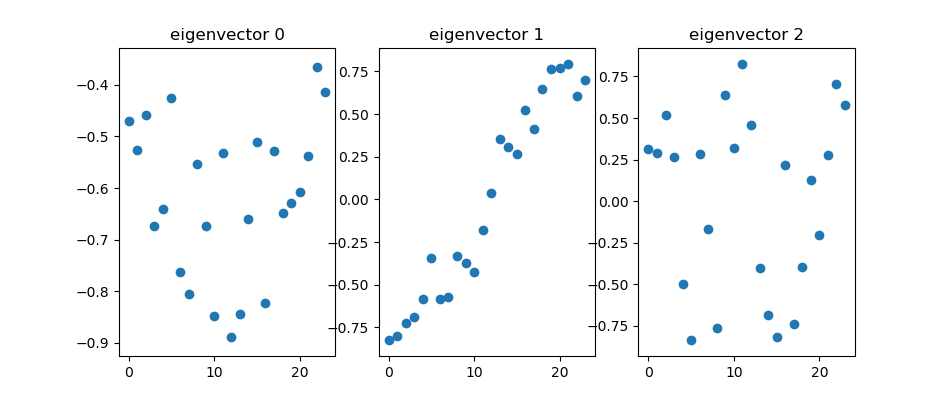

<IPython.core.display.Javascript object>


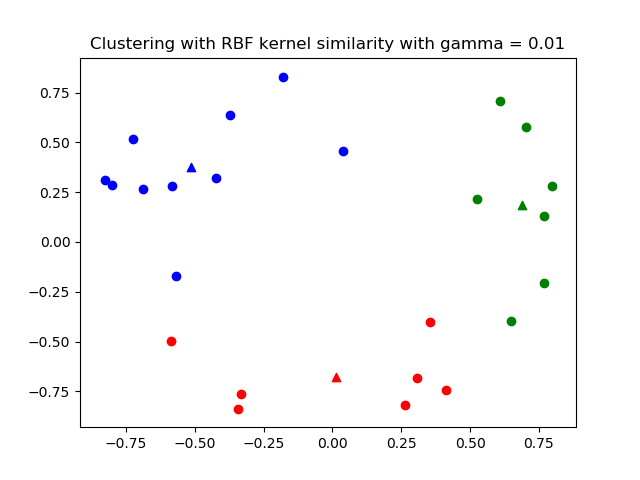

In [179]:
A = np.array(rbf_kernel(data, data, gamma=0.01))
(centroids, clusters), Y = spectral_clustering(A, 3, affinity=True)

xs = np.arange(0,Y.shape[0])
plt.figure(figsize=(9.5,4))
for i in range(Y.shape[1]):
    plt.subplot(1,Y.shape[1], i+1)
    plt.title('eigenvector %d' % i)
    plt.scatter(xs, Y[:,i])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Clustering with RBF kernel similarity with gamma = 0.01')
for key,centroid in zip(clusters,centroids):
    points = np.array(clusters[key])
    ax.scatter(points[:,0], points[:,1], c=color_map(key))
    ax.scatter(centroid[0], centroid[1], marker='^', c=color_map(key))
plt.show()

## RBF with Gamma = 0.1

[1.51152328e-16 1.21461656e-01 4.48874537e-01]


<IPython.core.display.Javascript object>


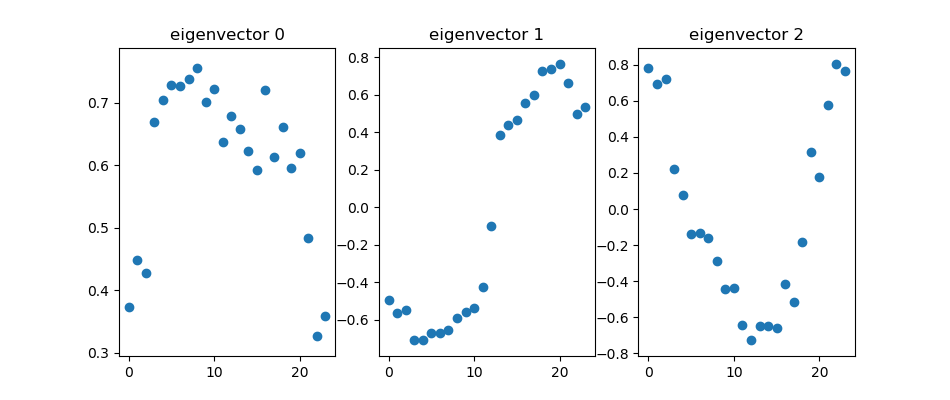

<IPython.core.display.Javascript object>


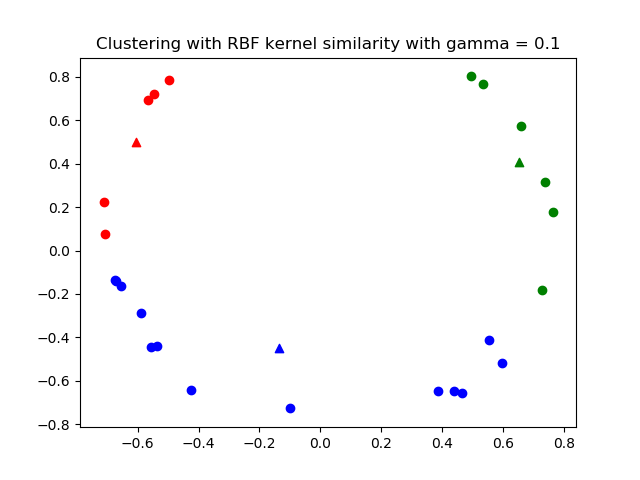

In [174]:
A = np.array(rbf_kernel(data, data, gamma=0.1))
(centroids, clusters), Y = spectral_clustering(A, 3, affinity=True)

xs = np.arange(0,Y.shape[0])
plt.figure(figsize=(9.5,4))
for i in range(Y.shape[1]):
    plt.subplot(1,Y.shape[1], i+1)
    plt.title('eigenvector %d' % i)
    plt.scatter(xs, Y[:,i])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Clustering with RBF kernel similarity with gamma = 0.1')
for key,centroid in zip(clusters,centroids):
    points = np.array(clusters[key])
    ax.scatter(points[:,0], points[:,1], c=color_map(key))
    ax.scatter(centroid[0], centroid[1], marker='^', c=color_map(key))
plt.show()

## RBF with Gamma = 1

evalues = [7.14371814e-17 9.40049236e-04 6.89518032e-03]


<IPython.core.display.Javascript object>


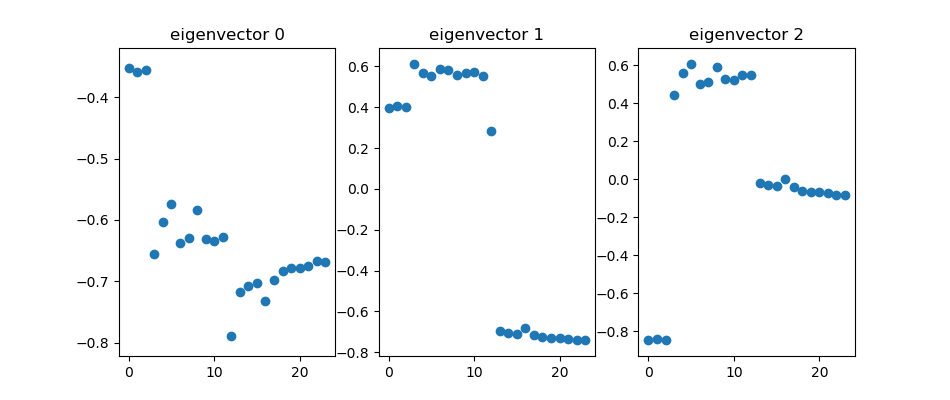

<IPython.core.display.Javascript object>


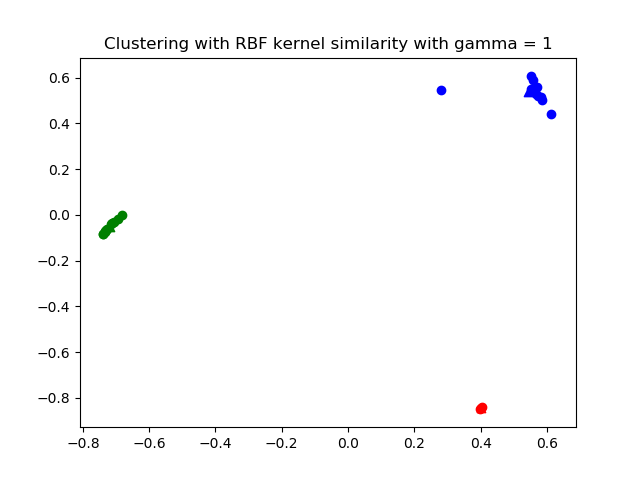

In [180]:
A = np.array(rbf_kernel(data, data, gamma=1))
(centroids, clusters), Y = spectral_clustering(A, 3, affinity=True)

xs = np.arange(0,Y.shape[0])
plt.figure(figsize=(9.5,4))
for i in range(Y.shape[1]):
    plt.subplot(1,Y.shape[1], i+1)
    plt.title('eigenvector %d' % i)
    plt.scatter(xs, Y[:,i])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Clustering with RBF kernel similarity with gamma = 1')
for key,centroid in zip(clusters,centroids):
    points = np.array(clusters[key])
    ax.scatter(points[:,0], points[:,1], c=color_map(key))
    ax.scatter(centroid[0], centroid[1], marker='^', c=color_map(key))
plt.show()

## RBF with Gamma = 10

evalues = [-3.91549323e-20  5.42440110e-17  6.07469222e-17]


<IPython.core.display.Javascript object>


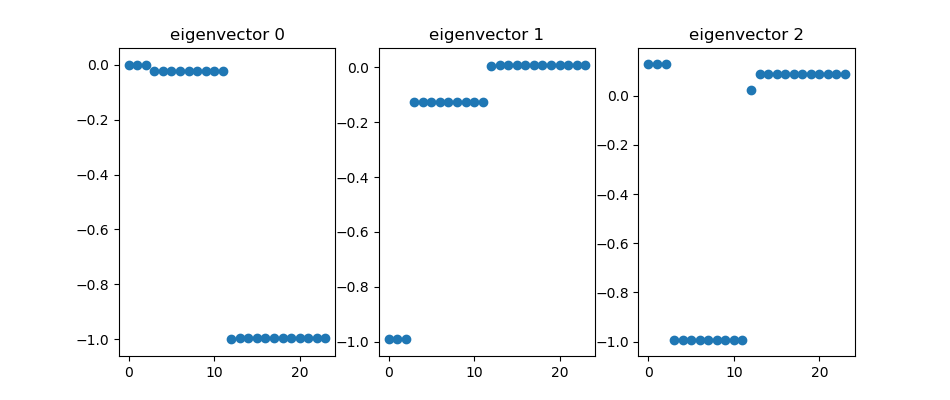

<IPython.core.display.Javascript object>


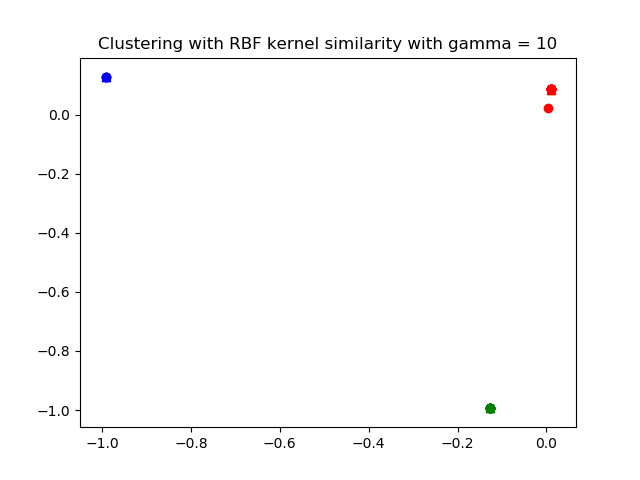

In [181]:
A = np.array(rbf_kernel(data, data, gamma=10))
(centroids, clusters), Y = spectral_clustering(A, 3, affinity=True)

xs = np.arange(0,Y.shape[0])
plt.figure(figsize=(9.5,4))
for i in range(Y.shape[1]):
    plt.subplot(1,Y.shape[1], i+1)
    plt.title('eigenvector %d' % i)
    plt.scatter(xs, Y[:,i])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Clustering with RBF kernel similarity with gamma = 10')
for key,centroid in zip(clusters,centroids):
    points = np.array(clusters[key])
    ax.scatter(points[:,0], points[:,1], c=color_map(key))
    ax.scatter(centroid[0], centroid[1], marker='^', c=color_map(key))
plt.show()

### Graph connectivity
The number of connected components in the graph is equal to the number of eigenvalues equal to 0 in the eigenvalue decomposition of the Laplacian matrix.

The eigenvalues are printed before each plot. Only gamma = 10 produces a disconnected graph because the first 3 eigenvalues are all zeros.

### 3-NN Similarity Graph 

evalues = [-0.2960374  -0.18823028 -0.01275928]


<IPython.core.display.Javascript object>


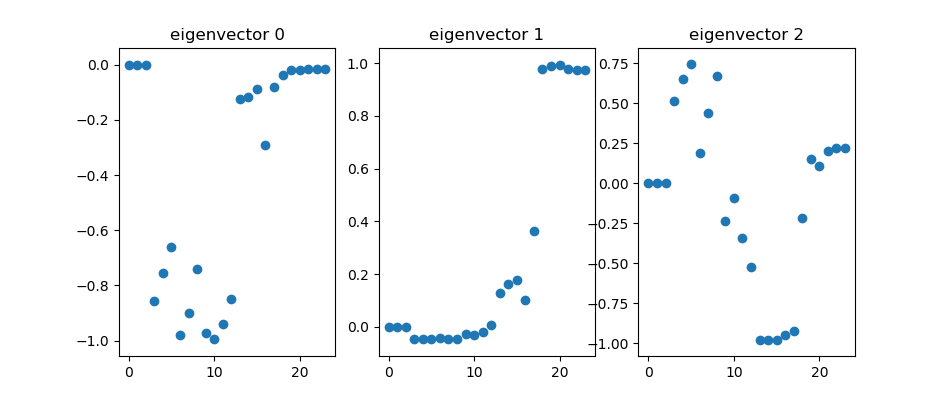

<IPython.core.display.Javascript object>


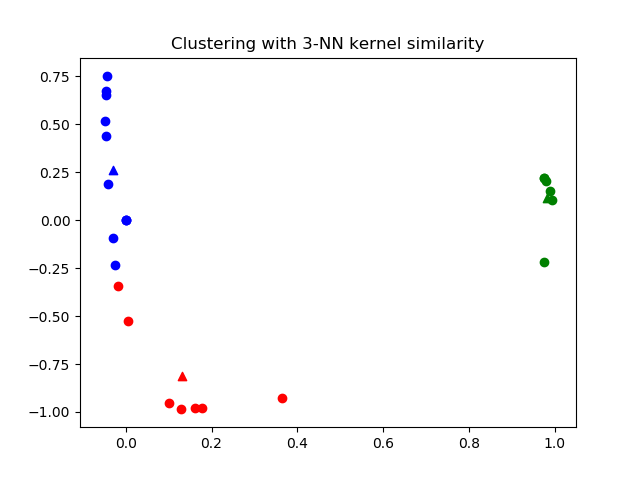

In [182]:
# construct 3-NN Graph as a similarity kernel
A = np.array(kneighbors_graph(data, 3).todense())
(centroids, clusters), Y = spectral_clustering(A, 3, affinity=True)

xs = np.arange(0,Y.shape[0])
plt.figure(figsize=(9.5,4))
for i in range(Y.shape[1]):
    plt.subplot(1,Y.shape[1], i+1)
    plt.title('eigenvector %d' % i)
    plt.scatter(xs, Y[:,i])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Clustering with 3-NN kernel similarity')

for key,centroid in zip(clusters,centroids):
    points = np.array(clusters[key])
    ax.scatter(points[:,0], points[:,1], c=color_map(key))
    ax.scatter(centroid[0], centroid[1], marker='^', c=color_map(key))
plt.show()